## 1. Practical session, part 1 : Reproducing kernels and interpolation


### Reproducing kernels

Let $H$ be a Hilbert space of functions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ is a reproducing kernel space if there exists a function
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ such that $\forall x\in{\mathbb R}^d, K_H(\cdot,x) \in H$, and

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ is then uniquely defined and is called the reproducing kernel of $H$. We can notice that we have the following property (reproducing property):

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Conversely, it is possible, from a function $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ of positive type, to construct the unique Hilbert space $H$ of functions such that $K_H=K$.

### Scalar interpolation problem

The kernel $K_H$ solves the following interpolation problem:

$$\left\{\begin{array}{l}
\text{Minimize }\left\|f\right\|_H\text{ for }f\in H,
\\ \text{under the constraints }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

where $y_i\in{\mathbb R}^d, c_i\in$ are fixed. The solution to this problem is given by
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
where the $a_j\in{\mathbb R}$ are solutions of the linear system

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

These equations can be written in condensed form: note ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, and $K_H({ \bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ the matrix of $K_H(y_i,y_j)$ for $1\leq i,j\leq n$. The linear system to be solved is then written

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

Similarly, the evaluation of the solution $f^*$ at points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ is written

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

where ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*( x_1),\ldots,f^*(x_p))$, and $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R} )$ is the matrix of $K_H(x_i,y_j)$ for $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

Here is a function
`KernelMatrix(x,y,h)` which builds
the matrix $K_H({\bf x},{\bf y})$ for points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\ mathbb R}^{nd}$ (assumed entered as arrays $p\times d$ and $n\times d$), and a kernel of the form $K_H(x,y)=h\left(\|x-y\|\right)$, where $h$ is a scalar function.

In [4]:
def KernelMatrix(x,y,h):
    p, d = x.shape
    n, d = y.shape
    K = np.zeros((p,n))
    for i in range(p):
        for j in range(n):
            K[i,j] = h(np.linalg.norm(x[i,:]-y[j,:]))
    return K


# faster vectorized version :
def KernelMatrix(x,y,h):
    D = np.linalg.norm(x[:,None,:]-y[None,:,:],axis=2)
    return h(D)


# Test of the function:
import numpy as np
x = np.random.rand(10,2)        # 10 points randomly sampled from [0,1]^2
y = np.random.rand(15,2)        # 15 points randomly sampled from [0,1]^2
sigma = 1.5                     # kernel scale
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))
print(Kxy)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[[0.88382858 0.90058253 0.83368749 0.86580004 0.98127482 0.91990011
  0.98761986 0.96703547 0.85244564 0.9747932  0.96700972 0.98978301
  0.869221   0.93786195 0.96728897]
 [0.940622   0.98371971 0.90793571 0.97861085 0.91926952 0.99202987
  0.84858626 0.91252717 0.94480845 0.80068288 0.90749952 0.95152001
  0.99587695 0.98456431 0.83601875]
 [0.80265413 0.81584235 0.74845626 0.76804866 0.94356682 0.83390231
  0.98622865 0.92601136 0.7608644  0.99606983 0.92808461 0.94399835
  0.76848475 0.85974

<br>
<br>

__Question__ : Write a function
`Interp(x,y,c,h)`
which solves the interpolation problem $f(y_i)=c_i$, $1\leq i\leq n$ and returns the evaluation of the solution at the points $x_i$, $1\leq i\leq p$

In [5]:
def Interp(x,y,c,h):
    Kyy = KernelMatrix(y, y, h)
    a = np.linalg.solve(Kyy, c)
    Kxy = KernelMatrix(x, y, h) 
    return Kxy @ a

<br>
We test function `Interp` first with $d=1$: 

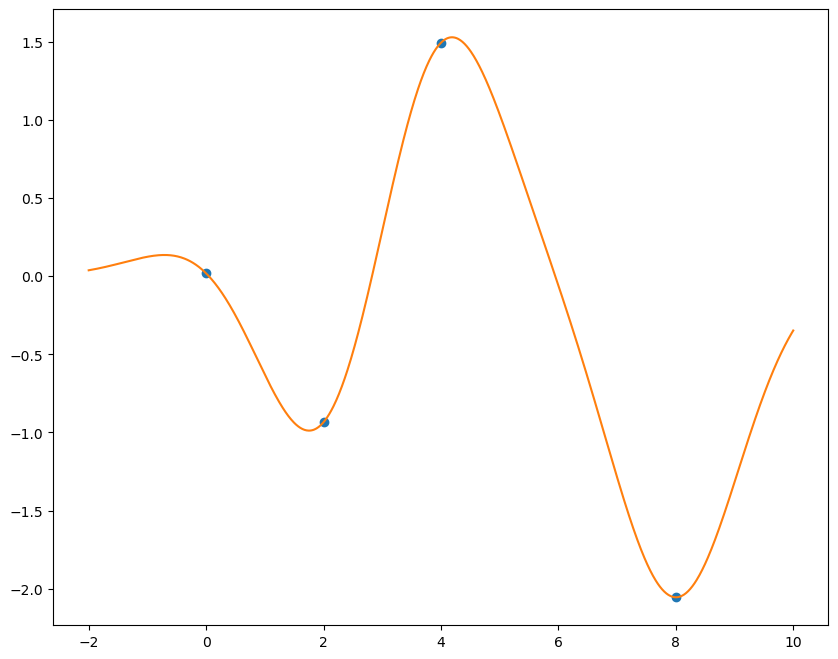

In [6]:
y = np.array([0,2,4,8])[:,None]         # vector [0,2,4,8] of points y_i given as matrix of size (4,1)
c = np.random.randn(4,1)                # radom values f(y_i)
x = np.linspace(-2,10,1000)[:,None]     # vector of points x_j where we want to evaluate the function
fx = Interp(x,y,c,gauss(sigma))         # computation of the interpolation

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(y,c,'o')                       # display
plt.plot(x,fx);

<br>
<br>

Below we test the same problem by changing the kernel scale: we will take $h(u)=e^{-u^2/\sigma^2}$ for $\sigma\in\{0.2,2,4, $10\}. We display the different solutions on the same graph. We also test the interpolation with Cauchy kernels: $h(u)=\frac1{1+u^2/\sigma^2}$.

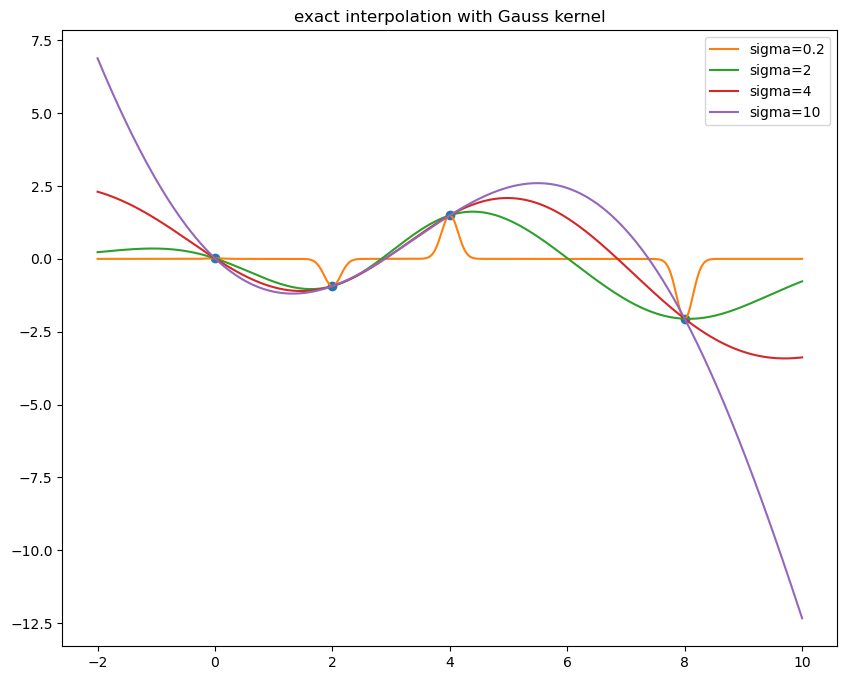

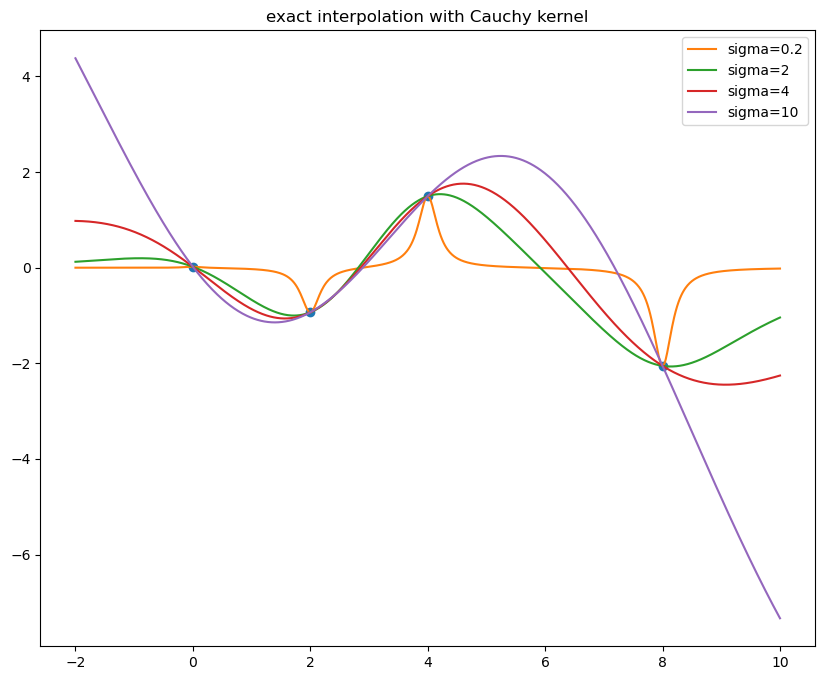

In [7]:
def gaussfct(sigma) :
    def f(u) :
        return np.exp(-u**2/sigma**2)
    return f

def cauchyfct(sigma) :
    def f(u) :
        return 1/(1+u**2/sigma**2)
    return f

for noyau in [(gaussfct,"Gauss kernel"),(cauchyfct,"Cauchy kernel")] :
    fct, id = noyau
    plt.figure()
    plt.title("exact interpolation with "+id)
    plt.plot(y,c,'o');
    for sigma in [0.2,2,4,10] :
        fx = Interp(x,y,c,fct(sigma))               # computation of the interpolation        
        plt.plot(x,fx,label="sigma="+str(sigma));   # display
    plt.legend()

<br>
<br>

Below we use the kernel $K_H(x,y)=h\left(\|x-y\|\right)$ with $h(u)=e^{-|u|}$ which is the kernel corresponding to the Sobolev space $H^1$.

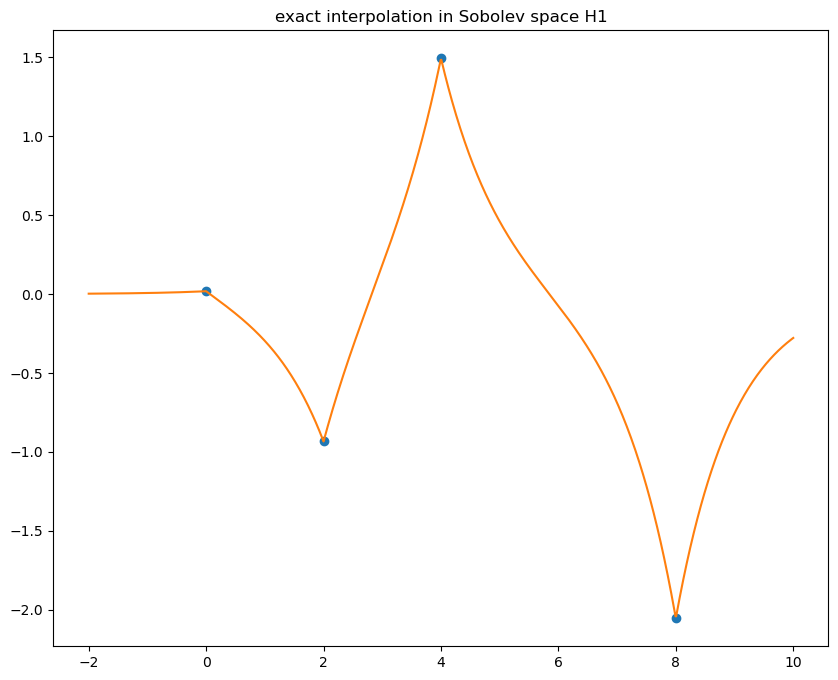

In [8]:
def H1fct() :
    def f(u) :
        return np.exp(-np.abs(u))
    return f
plt.figure()
plt.title("exact interpolation in Sobolev space H1")
plt.plot(y,c,'o');
fx = Interp(x,y,c,H1fct())            # computation of the interpolation
plt.plot(x,fx);     # display
plt.show()

<br>
<br>

Now we test the interpolation in the case $d=2$: we choose $10$ points $y_i$ in $[0,1]^2$ and randomly drawn reals $c_i$, then we evaluate on a uniform grid of $100*100$ points

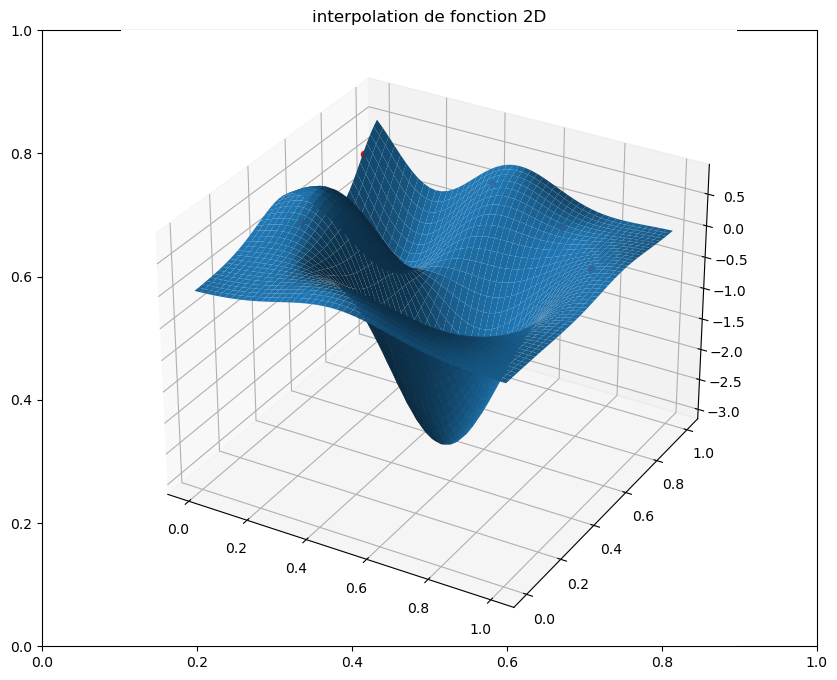

In [9]:
def InterpGrid(X1,X2,y,c,h) :
    ng1, ng2 = X1.shape
    x = np.concatenate((X1.reshape(ng1*ng2,1),X2.reshape(ng1*ng2,1)),axis=1)
    z = Interp(x,y,c,h) 
    Z = z.reshape(ng1,ng2)
    return Z

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points randomly sampled from [0,1]^2
c = np.random.randn(n,1)   # 10 random values
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # uniform grid of points of size (50,50)
Z = InterpGrid(X1,X2,y,c,gauss(sigma))


# We plot the interpolated function :

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.title("interpolation de fonction 2D")
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Z)
ax.scatter3D(y[:,0],y[:,1],c,c='r',depthshade=False)
plt.show()

<br>
<br>

### Relaxed interpolation

In some cases, the interpolation constraints may turn out to be too strong for the Hilbert norm used (typically when the scale parameter $\sigma$ is large compared to the positions of the interpolation points). Numerically this results in a very badly conditioned interpolation matrix. On the other hand, the observation data may be noisy, in which case a function passing exactly through the constraints is no longer desirable. A solution then consists in writing a relaxed interpolation problem (_smoothing spline interpolation_):

$$\text{Minimize }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
where $\lambda>0$ is a parameter to set.

The solution of the inexact interpolation is obtained by adding $\lambda$ to the diagonal coefficients of the matrix of the linear system.

<br>

Below we test this new model :

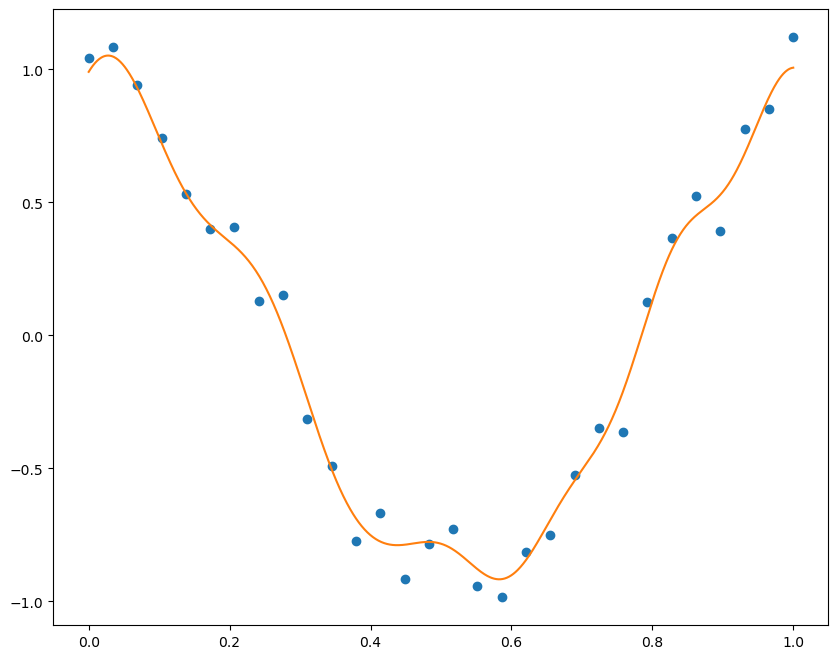

In [10]:
# redefining Interp function to include lambda parameter
def Interp(x,y,c,h,l=0):
    p = y.shape[0]
    # build the matrix of the linear system
    M = KernelMatrix(y,y,h) + l*np.eye(p)
    # solve the linear system
    a = np.linalg.solve(M,c)
    # evaluate the solution at points xi :
    Kxy = KernelMatrix(x,y,h)
    return Kxy @ a

# tests for several values of sigma and lambda
n = 30
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .15*np.random.randn(n,1)
l = 0.1
sigma = 0.1
h = gauss(sigma)
x = np.linspace(0,1,1000)[:,None]
fx = Interp(x,y,c,h,l)
plt.plot(y,c,'o')                       # display
plt.plot(x,fx);

<br>
<br>

### Vector interpolation problem

Suppose now that $V$ is a Hilbert space of vector-valued functions $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$.
If it exists, the reproducing kernel $K_V$ of the space $V$ is then an application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, defined by the relation:

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha }\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

The reproducing property is then written

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha },{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

We consider the following exact vector interpolation problem:

$$\text{Minimize }\left\| v\right\|_V\text{ for $v\in V$, under the constraints }v(y_i)=\gamma_i,$$

where $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ are fixed, $1\leq i\leq n$. We also consider the associated relaxed problem:

$$\text{Minimize }\gamma\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

For a kernel of the form $K_V(x,y)=h(\|x-y\|)I_m$, exact and relaxed vector interpolation problems are equivalent to $m$ scalar interpolation problems
with the scalar kernel $K_H(x,y)=h(\|x-y\|)$.

<br>

Below is an example of vector interpolation

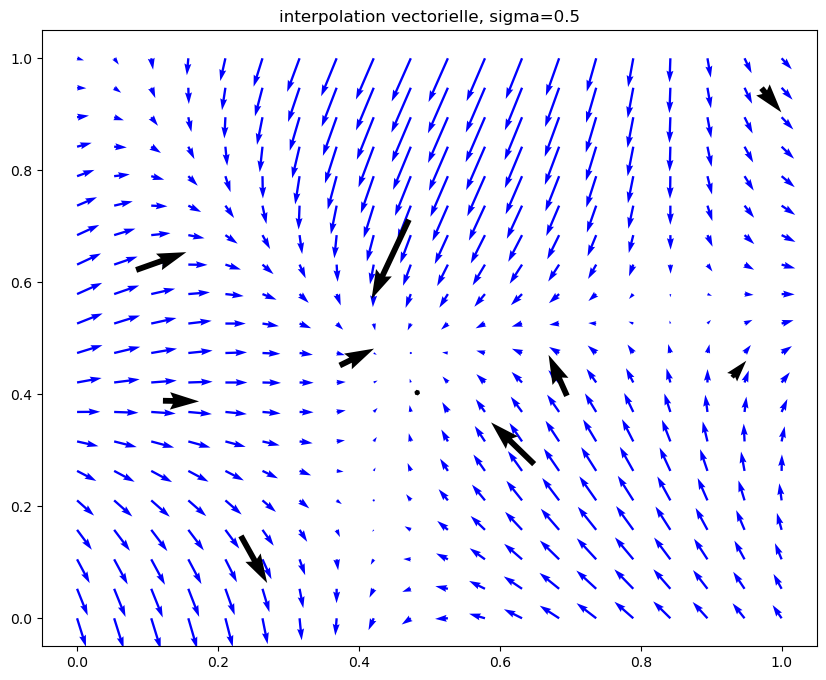

In [11]:
def InterpGrid2D(X1,X2,y,c,h,l=0) :
    # modification de InterpGrid devant renvoyer un interpolant vectoriel et non scalaire
    s = X1.shape
    x = np.hstack((X1.flatten()[:,None],X2.flatten()[:,None]))
    fx = Interp(x,y,c,h,l)
    fX1, fX2 = np.reshape(fx[:,0],s), np.reshape(fx[:,1],s)
    return fX1, fX2
        
n = 10
d = 2
m = 2
sigma = .5
l = 0.1
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma),l)
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);


<br>
<br>

## Landmark matching

### Linear matching

The previous vector interpolation problem, for $d=m$, can be seen as a point matching problem. For the "exact" version, this writes:
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

We simply come back to the previous problem by setting $\gamma_i=z_i-y_i$.

<br>

With the example of the previous question, we display in the same graph the points $y_i$ and $z_i$ and visualize the solution $\phi$ by calculating and displaying the displacement of a grid of points.

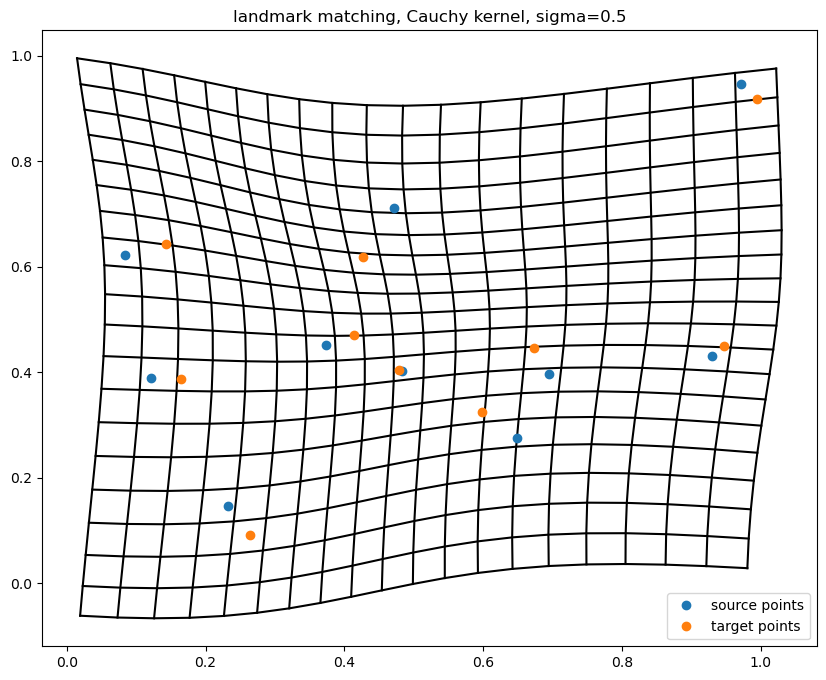

In [12]:
Z1 = X1 + V1
Z2 = X2 + V2
z = y + gamma
plt.figure();
plt.title("landmark matching, "+id+", sigma="+str(sigma))
plt.plot(Z1,Z2,'k');
plt.plot(Z1.T,Z2.T,'k');
plt.plot(y[:,0],y[:,1],'o',label="source points");
plt.plot(z[:,0],z[:,1],'o',label="target points");
plt.legend();

<br>

Now we turn to a practical example with a toy dataset. We load contours of two hands :

In [15]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

The arrays `C1` and `C2`
contain the coordinates of two hand outlines. With the following code, select reference points (finger tips, etc.) for each:

In [17]:
def save(obj,fname='store.pckl'):
    import pickle
    f = open(fname, 'wb')
    pickle.dump(obj, f)
    f.close()
def load(fname='store.pckl'):
    import pickle
    f = open(fname, 'rb')
    obj = pickle.load(f)
    f.close()
    return obj
    
fname = "hands.pckl"
if True:
    %matplotlib tk
    plt.rcParams["figure.figsize"] = (10,8)
    import scipy.io
    C1 = scipy.io.loadmat('hand1.mat')['C1']
    C2 = scipy.io.loadmat('hand2.mat')['C2']
    plt.figure()
    plt.plot(C1[:,0],C1[:,1])
    plt.title("Selection des landmarks - courbe 1")
    lmk1 = np.array(plt.ginput(0))
    plt.plot(lmk1[:,0],lmk1[:,1],'o')
    plt.show()
    print("lmk1=",lmk1)
    plt.figure()
    plt.plot(C2[:,0],C2[:,1])
    plt.title("Selection des landmarks - courbe 2")
    lmk2 = np.array(plt.ginput(0))
    plt.plot(lmk2[:,0],lmk2[:,1],'o')
    plt.show()
    print("lmk2=",lmk2)
    save((C1,C2,lmk1,lmk2),fname)
else:
    C1,C2,lmk1,lmk2 = load(fname)

lmk1= [[0.28461834 0.44078237]
 [0.44324581 0.36089251]
 [0.57282882 0.37943837]
 [0.71916825 0.64193363]]
lmk2= [[0.16468711 0.34283482]
 [0.28735065 0.2924442 ]
 [0.37754443 0.29676339]
 [0.48758083 0.49544643]]


<br>

We perform the pairing of the two sets of points and display on the same graph the curve $C_2$ and its reference points, the transformed curve $\phi(C_1)$ and the displacement of a grid of points.

In [18]:
sigma = .25
Z1, Z2 = InterpGrid2D(X1,X2,lmk1,lmk2-lmk1,gaussfct(sigma))
Z1 += X1
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(lmk2[:,0],lmk2[:,1],'x');
C1phi = C1 + Interp(C1,lmk1,lmk2-lmk1,gaussfct(sigma))
plt.plot(C1phi[:,0],C1phi[:,1]);

<br>
<br>

## Inclusion of affine displacements and the Thin Plate Splines model

It is possible to add affine displacements to the model. The exact matching problem then becomes:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

where $B$ is a square matrix of size $d$ and $c$ a vector. It can be shown that the optimal vector field is always written as a linear combination of the kernels $K_V(\cdot,y_i)$.

<br>

The linear system to be solved to obtain the coefficients of the vectors $\alpha_i$, $c$, and of the matrix $B$ can be found using Karush-Kuhn-Tucker conditions at the optimum.

Here is the example of hand contours matching with this new model :

In [ ]:
def InterpAffine(x,y,c,h,l=0):
    n,d = y.shape
    Kyy =  KernelMatrix(y,y,h) + l*np.eye(n)
    yt = np.concatenate((np.ones((n,1)),y),axis=1)
    M1 = np.concatenate((Kyy,yt),axis=1)
    M2 = np.concatenate((yt.T,np.zeros((d+1,d+1))),axis=1)
    M = np.concatenate((M1,M2))  
    ct = np.concatenate((c,np.zeros((d+1,c.shape[1]))))
    a = np.linalg.solve(M,ct)
    Kxy = KernelMatrix(x,y,h)
    nx = x.shape[0]
    xt = np.concatenate((np.ones((nx,1)),x),axis=1)
    N = np.concatenate((Kxy,xt),axis=1)
    return np.dot(N,a)

def InterpGrid2DAffine(X1,X2,y,c,h,l=0) :
    ng1, ng2 = X1.shape
    x = np.concatenate((X1.reshape(ng1*ng2,1),X2.reshape(ng1*ng2,1)),axis=1)
    z = InterpAffine(x,y,c,h,l) 
    Z1 = z[:,0].reshape(ng1,ng2)
    Z2 = z[:,1].reshape(ng1,ng2)
    return Z1,Z2
        

sigma = .25
Z1, Z2 = InterpGrid2DAffine(X1,X2,lmk1,lmk2-lmk1,gaussfct(sigma))
Z1 += X1
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(lmk2[:,0],lmk2[:,1],'x');
C1phi = C1 + InterpAffine(C1,lmk1,lmk2-lmk1,gaussfct(sigma))
plt.plot(C1phi[:,0],C1phi[:,1]);

<br>

Now we test this new model with the kernel $h(r)=r^2\log(r)$. This kernel is not of positive type but semi-positive, and can only be used by including affine transformations. This is called the "thin plate" spline model (TPS: Thin Plate Splines).

In [ ]:
def TPSfun(r):
    r[r==0]=1
    return r**2 * np.log(r)
Z1, Z2 = InterpGrid2DAffine(X1,X2,lmk1,lmk2-lmk1,TPSfun)
Z1 += X1
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(lmk2[:,0],lmk2[:,1],'x');
C1phi = C1 + InterpAffine(C1,lmk1,lmk2-lmk1,TPSfun)
plt.plot(C1phi[:,0],C1phi[:,1]);
